In [26]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

In [27]:
from sklearn.datasets import load_breast_cancer

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
breast_cancer_data = load_breast_cancer()

In [30]:
print(breast_cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [31]:
breast_cancer_Y = breast_cancer_data['target']
breast_cancer_X = breast_cancer_data['data']

In [32]:
Scaler = MinMaxScaler()

In [33]:
norm_breast_cancer_X = Scaler.fit_transform(breast_cancer_X)
norm_breast_cancer_X

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [34]:
import pandas as pd 
breast_cancer_X.shape

(569, 30)

In [35]:
def nonlin(x,deriv=False): #создание сигмоиды; в соответств от 0 до 1; преобр в вероятности;   deriv = True - производная
    if(deriv==True):
        return x*(1-(x))

    return 1/(1+np.exp(-x))
    
#X входной набор данных 
                
#y выходной набор данных
#l0 первый слой сети
#l1 -l2 - скрытые слои сети 
# l3 -финальный выходной слой - гипотеза
#syn - слои весов
# l2_error – промах сети в количественном выражении
# l2_delta – ошибка сети, в зависимости от уверенности предсказания. Почти совпадает с ошибкой, за исключением уверенных предсказаний
# l1_error – взвешивая l2_delta весами из syn1, мы подсчитываем ошибку в среднем/скрытом слое
# l1_delta – ошибки сети из l1, масштабируемые по увеернности предсказаний. Почти совпадает с l1_error, за исключением уверенных предсказаний
np.random.seed(1) #каждый раз одно и то же случайное распределение
# случайно инициализируем веса, в среднем - 0; «synapse zero» 
syn0 = 2*np.random.random((30,10)) - 1 #задаем веса и размер слоёв случайно;  матрица весов сети
syn1 = 2*np.random.random((10,3)) - 1 
syn2 = 2*np.random.random((3,1)) - 1
lr = 0.005
def suit(X, y, kolvo_epox):
    global syn0, syn1, syn2
    error = []
    accuracy = []
    f1 = []
    for i in range(kolvo_epox):
        #прямое распространение
        l0 = X
        l1 = nonlin(np.dot(l0,syn0)) #матричное перемножение 
        l2 = nonlin(np.dot(l1,syn1))
        l3 = nonlin(np.dot(l2,syn2))
        #обтратное распространение
        l3_error = l3 - y # в l1  догадки, сравниваем с реальностью, . l_error – вектор из положительных и отрицательных чисел, характеризующий «промах» сети.
        l3_delta = l3_error*nonlin(l3,deriv=True) #производная, взвешенная по ошибкам; уменьшаем ошибки предсказаний, сделанных с высокой уверенностью
        l2_error = l3_delta.dot(syn2.T) # ошибка
        l2_delta = l2_error*nonlin(l2,deriv=True) #
        l1_error = l2_delta.dot(syn1.T) #Использует ошибки, взвешенные по уверенности предсказаний из l2, чтобы подсчитать ошибку для l1; обратное распространение ошибок
        l1_delta = l1_error * nonlin(l1,deriv=True)
        #обновляем веса
        syn0 -= lr*l0.T.dot(l1_delta) 
        syn1 -= lr*l1.T.dot(l2_delta) 
        syn2 -= lr*l2.T.dot(l3_delta)
        if i%100 == 0:
            print('Значение ошибки: ', np.mean(l3_error**2))
        error.append(np.mean(l3_error**2))
        accuracy.append(accuracy_score(y,np.round(l3)))
        f1.append(f1_score(y,np.round(l3)))
    return {'output':l3, 'error':error, 'accuracy':accuracy, 'f1': f1}

In [36]:
breast_cancer_Y_reshaped = breast_cancer_Y.reshape(-1,1)


In [37]:
predict_Y = suit(norm_breast_cancer_X, breast_cancer_Y_reshaped,10000)

Значение ошибки:  0.27536235826801375
Значение ошибки: 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


 0.17132698437050847
Значение ошибки:  0.07307178985411406
Значение ошибки:  0.04669172513692355
Значение ошибки:  0.03504005645900472
Значение ошибки:  0.028553863884630812
Значение ошибки:  0.02464994231775638
Значение ошибки:  0.022108799499351902
Значение ошибки:  0.02033875761369707
Значение ошибки:  0.01904153514800902
Значение ошибки:  0.01805259087118914
Значение ошибки:  0.017273634012041874
Значение ошибки:  0.016642656170402975
Значение ошибки:  0.016118989111948267
Значение ошибки:  0.015675135668107232
Значение ошибки:  0.015292019832227235
Значение ошибки:  0.014956103224738249
Значение ошибки:  0.014657577086311309
Значение ошибки:  0.014389198410080373
Значение ошибки:  0.014145523319076947
Значение ошибки:  0.013922391557156728
Значение ошибки:  0.013716573318518686
Значение ошибки:  0.013525523226443847
Значение ошибки:  0.013347206388748164
Значение ошибки:  0.013179973766248108
Значение ошибки:  0.013022471784675409
Значение ошибки:  0.012873576034090168
Значение ош

In [38]:
from sklearn.metrics import precision_recall_fscore_support

In [39]:
output_Y = predict_Y['output'] #вывод предсказаний
error_Y = predict_Y['error'] #разница между предскзаниями и реальными значениями
accuracy_Y = predict_Y['accuracy']
f1_Y = predict_Y['f1']



In [40]:
print('Вывод=', output_Y)

Вывод= [[1.72769342e-04]
 [3.02587279e-04]
 [2.05007470e-04]
 [7.49002964e-04]
 [3.48198328e-04]
 [3.87579067e-03]
 [2.55972669e-04]
 [3.41586622e-03]
 [6.30479097e-04]
 [3.65294815e-03]
 [3.07415478e-03]
 [6.00362358e-04]
 [1.14072226e-01]
 [1.53332423e-01]
 [3.03158052e-02]
 [6.30718449e-04]
 [4.46395979e-04]
 [2.08224858e-04]
 [1.72973085e-04]
 [9.82842346e-01]
 [9.99899948e-01]
 [9.99977576e-01]
 [1.26633040e-03]
 [1.74576740e-04]
 [1.69007174e-04]
 [2.04721156e-04]
 [4.76691298e-04]
 [3.79255975e-04]
 [2.30605888e-04]
 [4.89034309e-03]
 [1.79245775e-04]
 [7.46536616e-04]
 [1.97919740e-04]
 [2.54542570e-04]
 [4.01337529e-04]
 [3.18064375e-04]
 [6.05432262e-03]
 [9.99981479e-01]
 [9.99684161e-01]
 [1.10528961e-02]
 [5.66497830e-01]
 [6.75272077e-03]
 [2.09902849e-04]
 [1.07506466e-03]
 [4.22014711e-03]
 [2.41578928e-04]
 [9.99972405e-01]
 [1.08236472e-03]
 [9.98679519e-01]
 [8.05698921e-01]
 [9.99865511e-01]
 [9.99838777e-01]
 [9.99879683e-01]
 [4.17771730e-04]
 [2.34881855e-03]
 [9

In [41]:
print('Точность', accuracy_Y)

Точность [0.37258347978910367, 0.37258347978910367, 0.37258347978910367, 0.38488576449912126, 0.648506151142355, 0.6309314586994728, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.6274165202108963, 0.62741

In [42]:

print('F1', f1_Y)

F1 [0.0, 0.0, 0.0, 0.04371584699453551, 0.7792494481236204, 0.7727272727272727, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 0.7710583153347732, 

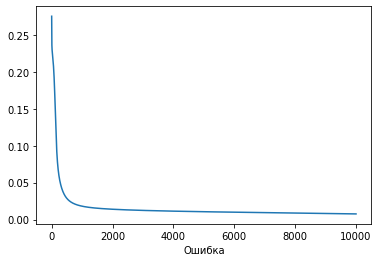

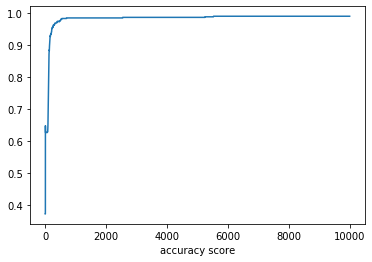

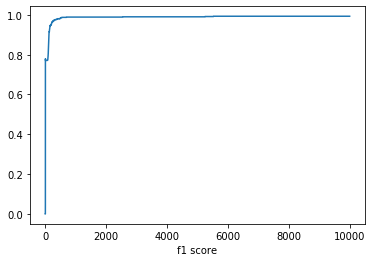

In [43]:
plt.plot(error_Y)
plt.xlabel('Ошибка')
plt.show()
plt.plot(accuracy_Y)
plt.xlabel('accuracy score')
plt.show()
plt.plot(f1_Y)
plt.xlabel('f1 score')
plt.show()

In [44]:
accuracy = accuracy_score(breast_cancer_Y,np.squeeze(np.round(output_Y)))
precision, recall, f1_score, _ = precision_recall_fscore_support(breast_cancer_Y, np.squeeze(np.round(output_Y)), average='binary')

In [45]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)
 

Accuracy:  0.9912126537785588
Precision:  0.9861878453038674
Recall:  1.0
F1 score:  0.9930458970792767


# ВЫВОДЫ:
    Таким образом, вес первого входа по отношению к выходу будет постоянно увеличиваться или оставаться постоянным, а два других веса будут увеличиваться и уменьшаться в зависимости от примеров. Этот эффект и способствует обучению сети на основе корреляций входных и выходных данных.

In [46]:
# Чтобы разбить на более чем два класса, такие как обучение, тест и валидация, можно сделать:

# probs = np.random.rand(len(df))
# training_mask = probs < 0.7
# test_mask = (probs>=0.7) & (probs < 0.85)
# validatoin_mask = probs >= 0.85


# df_training = df[training_mask]
# df_test = df[test_mask]
# df_validation = df[validatoin_mask]
# Это поставит 70% данных на обучение, 15% в тестах и 15 % в валидации.